# Evaluation der Imputation Methoden

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [27]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

backfill = pd.read_csv('additional_data/imputed_sets/backfill.csv')
mean = pd.read_csv('additional_data/imputed_sets/mean.csv')
interpolation = pd.read_csv('additional_data/imputed_sets/interpolation.csv')
ice = pd.read_csv('additional_data/imputed_sets/ice.csv')
mice = pd.read_csv('additional_data/imputed_sets/mice.csv')

In [28]:
mice

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Access to clean fuels and technologies for coo...,86275020303.4365,147982401903.0087,247376515065.0128,137106240576.9576,211536982339.2278,220730490346.7019,273246250916.2981,336234922631.0844,...,21.5000,23.0000,24.8000,26.7000,28.6000,1932537420516.9580,2000627578355.2400,34.1000,36.0000,-407182086929.0682
1,Afghanistan,Access to electricity (% of population),129995952014.1647,138848158185.1094,153881256175.2116,188957382727.2926,212266688468.6056,216815739218.7988,179113002930.0021,94658720677.9043,...,43.2220,69.1000,68.9829,89.5000,71.5000,97.7000,97.7000,98.7156,97.7000,954356239075.6284
2,Afghanistan,"Access to electricity, rural (% of rural popul...",219352999629.8546,220266302986.6953,177760935965.6010,232541321529.5679,243239741262.2280,256705515252.9425,314767589617.3015,319235721199.9545,...,29.5729,60.8492,61.3158,86.5005,64.5734,97.0994,97.0920,98.3096,96.9022,-1252043080210.8430
3,Afghanistan,"Access to electricity, urban (% of urban popul...",140094466594.0839,147766747946.6925,127259623217.9156,128385817906.4150,156025721550.7487,168514818359.3650,221224113357.2507,277467671138.5148,...,86.5678,95.0000,92.7734,98.7000,92.5000,99.5000,99.5000,99.9021,100.0000,-1236059237604.5554
4,Afghanistan,Adjusted savings: education expenditure (curre...,209232072046.2889,243954790767.4548,241453974357.5169,203936550974.6541,235625730996.1566,271651193813.2910,326441410155.0748,474781599488.4043,...,509167006.6272,442309235.9284,577464375.5885,611295312.2687,520962469.5818,471950680.4330,495836072.9351,480958390.7067,508272010.1646,633052831786.7244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26065,Zimbabwe,"Unemployment, youth total (% of total labor fo...",17959970414.0599,10.0940,10.2330,10.2350,372346520.7722,11.6680,12.9900,14.4190,...,8.4850,7.8940,7.3330,6.7070,6.7610,6.8250,6.8720,6.9260,7.0050,7.6330
26066,Zimbabwe,Urban population,3024147.0000,3176318.0000,-31182133935.9077,3432105.0000,3528870.0000,3620850.0000,3708423.0000,3791270.0000,...,4257061.0000,4306228.0000,4359432.0000,4416224.0000,4473872.0000,4531238.0000,4589452.0000,4650597.0000,4717307.0000,4792105.0000
26067,Zimbabwe,Urban population (% of total population),28.9880,29.7380,30.4990,30.9400,31.3350,31.7320,32.1320,32.5340,...,33.0150,32.8340,32.6540,32.5040,32.3850,32.2960,32.2370,32.2090,32.2100,32.2420
26068,Zimbabwe,Urban population growth (annual %),5.2853,4.9094,4.5611,3.1840,2.7804,2.5731,2.3898,2.2094,...,0.9897,1.1483,1.2279,1.2943,1.2969,-108991114561.2399,1.2765,1.3235,1.4242,1.5732


In [13]:
def make_cluster_heatmap(df, year):
    
    df= df.reset_index()
    df = df[['Country Name', 'Indicator Name', str(year)]]
    df = df.set_index(['Country Name', 'Indicator Name']).unstack()
    df.columns = df.columns.droplevel(0)
    
    var_clus = VarClusHi(df,  maxclus=20)
    var_clus.varclus()
    df_clus = var_clus.rsquare
    df_clus.sort_values(['Cluster', 'RS_Ratio'], inplace=True)
    var = df_clus['Variable']
  
    df = df.reindex(columns=var)
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax = sns.heatmap(df.corr(), square=True, linewidths=0, annot=False,
                     vmin=-1, vmax=1, center=0,
                     cmap = sns.diverging_palette(230, 20, as_cmap=True))

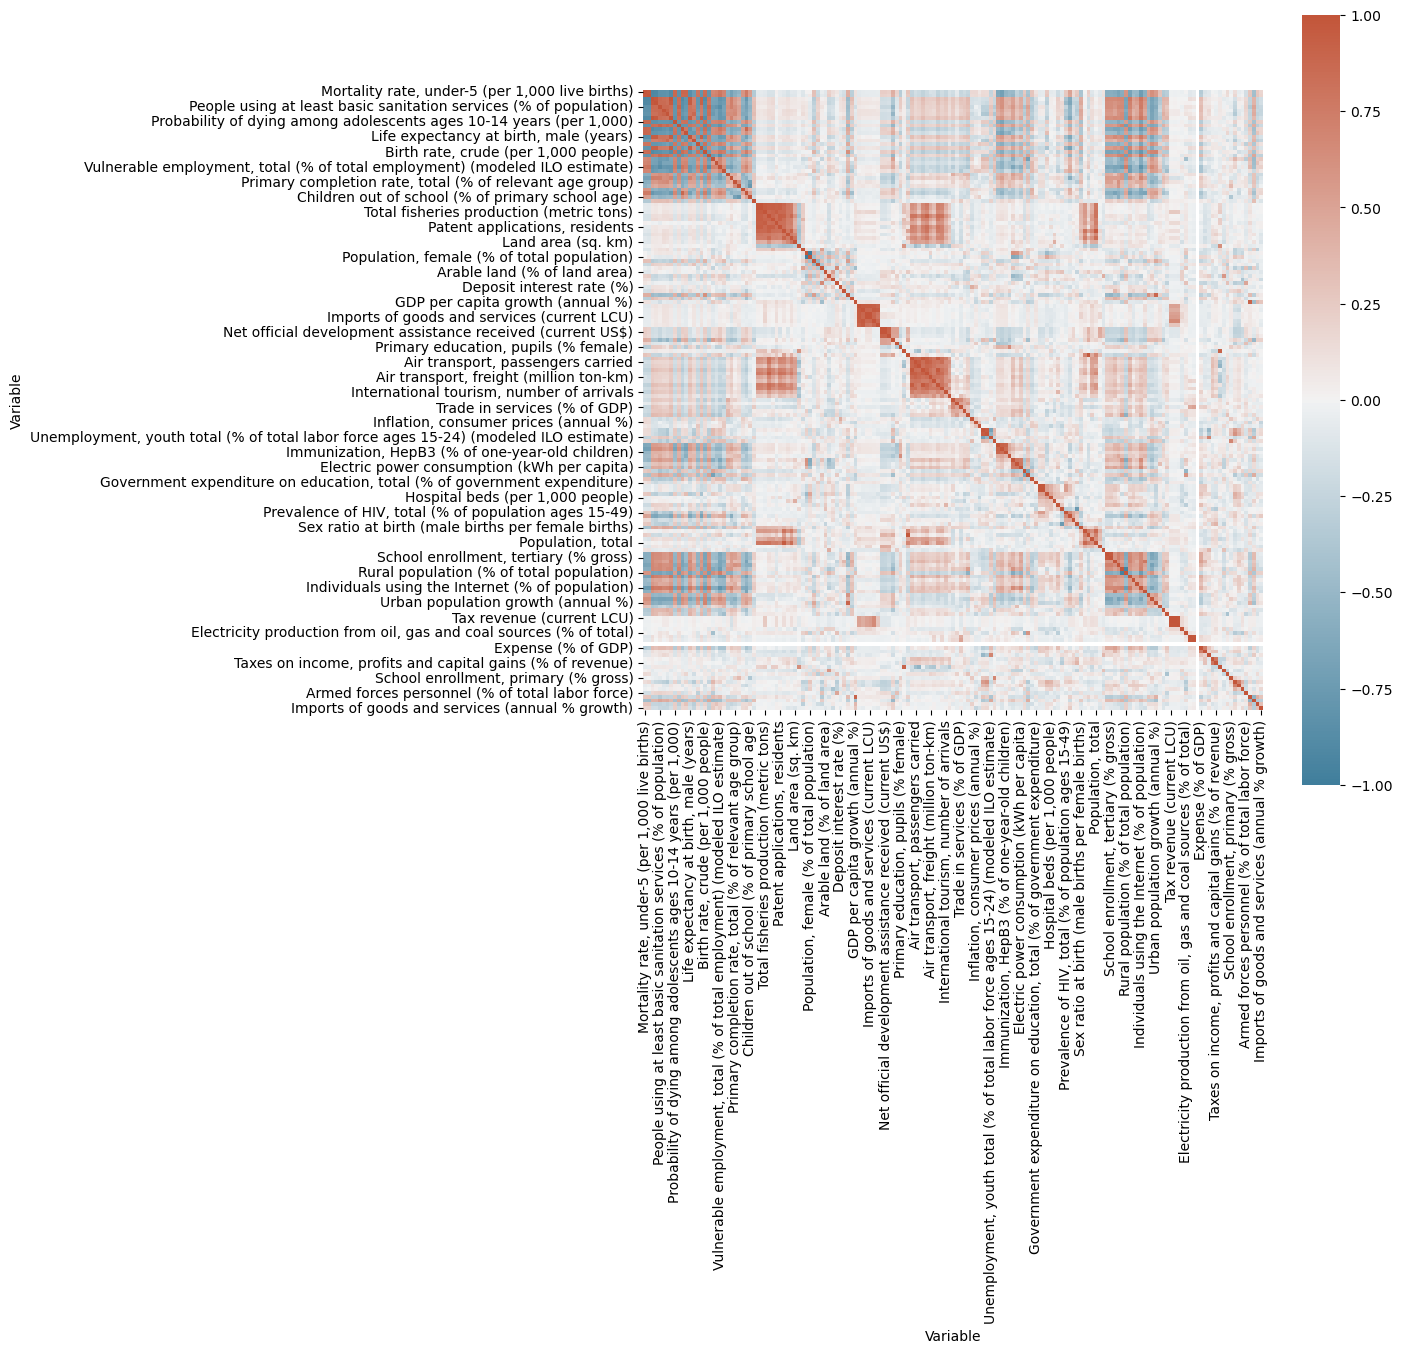

In [20]:
make_cluster_heatmap(mean, 2014)

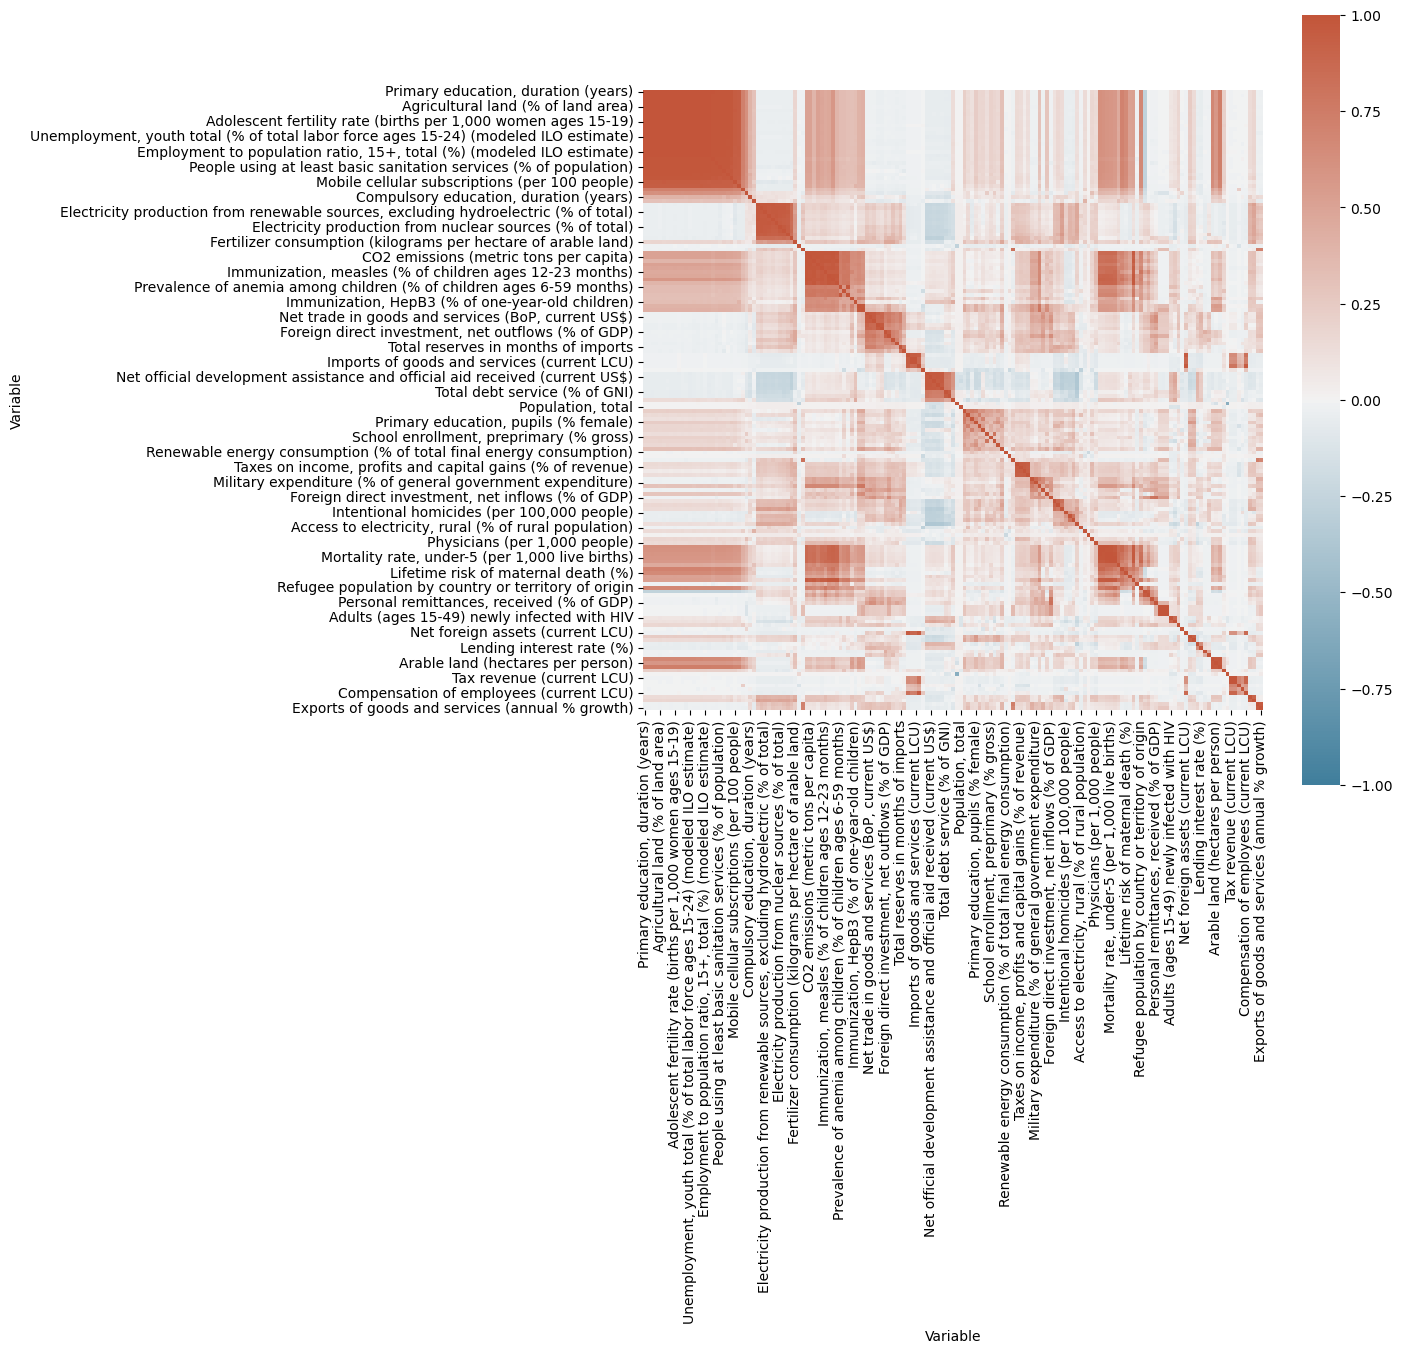

In [16]:
make_cluster_heatmap(mice, 2014)